Original work by Tom McCauley in https://github.com/tpmccauley/cmsopendata-jupyter/blob/master/Wmunu.ipynb
Pls refer to that when reusing this material, but note that the event selection to produce the dataset used here is different: there are no other cuts (on pt, eta, else) than requiring GlobalMuon.

In [1]:
import pandas as pd 
#pandas is for data structures and data analysis tools
import numpy as np
#numpy is for scientific computing
import matplotlib.pyplot as plt
#matplotlib is for plotting

In [2]:
#These data have been selected from the 2011 SingleMu dataset http://opendata.cern.ch/record/32
#Two muons and missing et have been written out to the csv file
data = pd.read_csv('http://kati.web.cern.ch/kati/SingleMuonMet.csv')

In [4]:
len(data)

457575

In [37]:
pd.set_option('display.max_columns', None)
data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,iso1,chisq1,dxy1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,iso2,chisq2,dxy2,met_et,met_phi
0,173389,489861810,G,81.20700,-19.73920,-13.390400,77.62490,23.85240,1.895960,-2.545530,1,0.757915,0.859481,0.001574,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,4.87528,-1.477850
1,173389,489865843,G,20.89240,-14.55570,-14.942700,1.15372,20.86030,0.055279,-2.343080,1,7.996410,0.861278,0.017863,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,24.22140,-1.851490
2,173389,489914455,G,12.95950,3.13972,-3.732570,-12.00610,4.87749,-1.632850,-0.871451,-1,2.153700,0.856005,0.093071,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,7.47978,-1.580460
3,173389,489963747,G,29.63810,6.25372,28.679100,-4.09978,29.35300,-0.139221,1.356100,1,0.000000,0.845578,-0.060012,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,30.66700,-2.130810
4,173389,489925803,G,7.01111,-1.61130,0.006709,-6.82262,1.61131,-2.150000,3.137430,-1,0.643718,2.970230,-0.041494,G,11.2786,1.43852,2.48368,-10.9068,2.87019,-2.04503,1.04582,1.0,1.36497,8.03214,-0.045094,13.75300,-0.996907


In [6]:
mass_squared = (data.E1 + data.E2)**2 - ((data.px1 + data.px2)**2 +(data.py1 + data.py2)**2  +(data.pz1 + data.pz2)**2)
mass_squared_pos = mass_squared[(mass_squared >0)]
inv_mass = np.sqrt(mass_squared_pos)

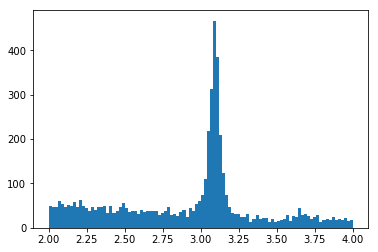

In [36]:
#Z-boson
plt.hist(inv_mass, bins=100, range=(2,4))
plt.show()

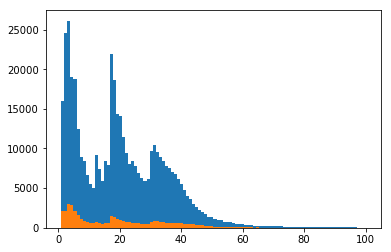

In [8]:
#it was verified that there are very few cases with 3 muons and therefore only two first were written out
plt.hist(data.pt1, bins=100, range=(1,100))
plt.hist(data.pt2, bins=100, range=(1,100))


plt.show()

In [9]:
#select events with one muon only
data_25 = data[(data.pt1>25) & (np.abs(data.eta1<2.1)) & (data.pt2==0)]
#add an additional selection on missing et
data_met = data_25[(data_25.met_et>25)]

In [34]:
#compute the transverse mass for the W boson (decay in muon and neutrino)
mass_t = np.sqrt(2*data.pt1*data.met_et*(1-np.cos(data.phi1-data.met_phi)))

mass_t25 = np.sqrt(2*data_25.pt1*data_25.met_et*(1-np.cos(data_25.phi1-data_25.met_phi)))
mass_met= np.sqrt(2*data_met.pt1*data_met.met_et*(1-np.cos(data_met.phi1-data_met.met_phi)))



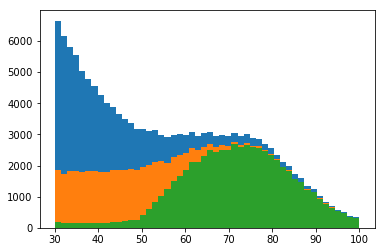

In [25]:
plt.hist(mass_t, bins=50, range=(30,100))
plt.hist(mass_t25, bins=50, range=(30,100))
plt.hist(mass_met, bins=50, range=(30,100))


plt.show()

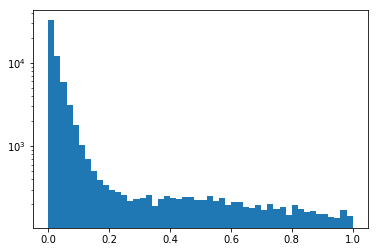

In [26]:
#look at the isolation variable
plt.hist(data_met.iso1/data_met.pt1, bins=50, range=(0,1))

plt.yscale('log')
plt.show()

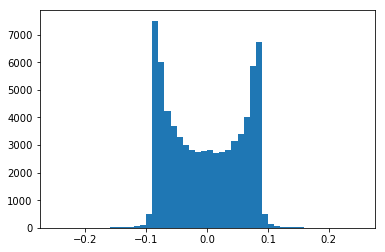

In [27]:
#check the impact parameter
plt.hist(data_met.dxy1, bins=50, range=(-0.25,0.25))
plt.show()

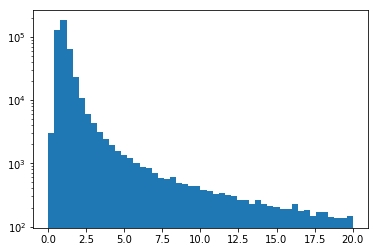

In [28]:
#check the quality of the track fit
plt.hist(data.chisq1, bins=50, range=(0,20))
plt.yscale('log')

plt.show()

In [29]:
#make an alternative selection based on these criteria (without the requirement on missing et)
select = data_25[(data_25.chisq1 < 10) & (data_25.dxy1 < 0.2) & (data_25.iso1/data_25.pt1 < 0.1)]

In [30]:
len(select)

73041

In [31]:
mass_s = np.sqrt(2*select.pt1*select.met_et*(1-np.cos(select.phi1-select.met_phi)))

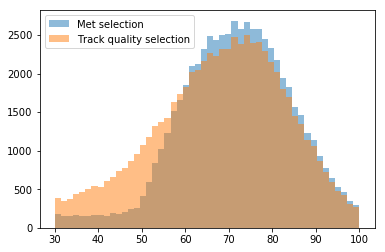

In [39]:
#compare the two selections
plt.hist(mass_met, bins=50, alpha=0.5, label='Met selection', range=(30,100))

plt.hist(mass_s, bins=50, alpha=0.5, label='Track quality selection', range=(30,100))
plt.legend()
plt.show()